In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 1. Importing Libraries

In [2]:
!pip install pyspellchecker

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk
#import keras
import os
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk import clean_html
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 2. Loading Data

In [5]:
dataTrain = pd.read_csv('train.csv') 

# 3. Understanding Data

In [6]:
dataTrain.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
for col in dataTrain.columns:
    print(col+ ' - ' + format(dataTrain[col].isnull().sum()))

id - 0
keyword - 61
location - 2533
text - 0
target - 0


In [9]:
dataTrain.drop(['id','keyword','location'],inplace=True,axis=1)
dataTrain.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# 4. Data Cleaning

## converting text to tokens of word

In [10]:

#data

In [11]:
def remove_html(w):
    soup = BeautifulSoup(w)
    text = soup.get_text()
    return w

In [12]:
def remove_url(text):
    # remove urls
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [13]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [14]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [15]:
def cleanData(data):
    # remove urls
    data['text'] = data['text'].apply(lambda x:remove_url(x))
    print('urls removed')
    
    # remove emojis
    data['text'] = data['text'].apply(lambda x:remove_emoji(x))
    print('emojis removed')
    # correct spellings
    # commenting this out because this takes very long
    #data['text'] = data['text'].apply(lambda x:correct_spellings(x))
    
    # tokenizing words
    data['text'] = data['text'].apply(lambda x:word_tokenize(x))
    print('tokenization done')
    
    # convert all text to lowercase
    data['text'] = data['text'].apply(lambda x:[w.lower() for w in x ])
    print('lowercase done')
    
    # remove html tags
    data['text'] = data['text'].apply(lambda x:[remove_html(w) for w in x])
    print('html tags removed')
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    
    # removing puncutations
    data['text'] = data['text'].apply(lambda x:[re_punc.sub('',w) for w in x])
    print('punctuations removed')
    
    # removing non alphabetic words 
    data['text'] = data['text'].apply(lambda x:[w for w in x if w.isalpha()])
    print('numeric removed')
    
    # removing stopwords
    data['text'] = data['text'].apply(lambda x:[w for w in x if w not in stopwords.words('english')])
    print('stopwords removed')
    
    # removing short words
    data['text'] = data['text'].apply(lambda x:[w for w in x if len(w)>2])
    print('shortwords removed')
    
    return data

In [16]:
backup = dataTrain.copy()

In [17]:
dataTrain = backup

In [18]:
#data = pd.DataFrame(['How 123 are you doing Today major qr ?is this corect','fine thank you <b>colonel</b>! https://www.kaggle.com/c/nlp-getting-started'],columns=['text'])
data = cleanData(dataTrain)

urls removed
emojis removed
tokenization done
lowercase done


C:\Users\daisycharlie\Anaconda3\envs\tf2\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\daisycharlie\Anaconda3\envs\tf2\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\daisycharlie\Anaconda3\envs\tf2\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\daisycharlie\Anaconda3\envs\tf2\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\dais

html tags removed
punctuations removed
numeric removed
stopwords removed
shortwords removed


In [19]:
dataTrain.head()

,text,target
0,"[deeds, reason, earthquake, may, allah, forgive]",1
1,"[forest, fire, near, ronge, sask, canada]",1
2,"[residents, asked, shelter, place, notified, o...",1
3,"[people, receive, wildfires, evacuation, order...",1
4,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [20]:
#dataTrain.drop(['keyword','location'],inplace=True,axis=1)
#dataTrain.head()

In [21]:
#dataTrain.drop(['id'],inplace=True,axis=1)
#dataTrain.head()

lematize data

In [22]:
backup = dataTrain.copy()

In [23]:
dataTrain = backup
dataTrain.head()

,text,target
0,"[deeds, reason, earthquake, may, allah, forgive]",1
1,"[forest, fire, near, ronge, sask, canada]",1
2,"[residents, asked, shelter, place, notified, o...",1
3,"[people, receive, wildfires, evacuation, order...",1
4,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [24]:
lem = WordNetLemmatizer()
dataTrain['text'] = dataTrain['text'].apply(lambda x:[lem.lemmatize(w) for w in x])

In [25]:
# join text
dataTrain['text'] = dataTrain['text'].apply(lambda x:' '.join(x))

In [26]:
dataTrain.sample(5)

,text,target
3769,word charlie daniel fire mountain run boy run,1
1497,learning legacy catastrophic eruption,1
3704,want hurt fear drove midnight,0
4839,mnpdnashville montalbanony sadly suicide cop w...,1
283,apocalypse upon,0


# Modelling

## using scikit learn

In [28]:
X = dataTrain['text']
Y = dataTrain['target']

In [29]:
tfidf = TfidfVectorizer()
tfidfFit = tfidf.fit(X)
X = tfidf.transform(X)

In [30]:
import pickle

In [31]:

pkl_Filename = "tfidfFit"

with open(pkl_Filename, 'wb') as file:
    pickle.dump(tfidfFit,file)

In [32]:
X = X.toarray()

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.15)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve

In [35]:
conMatList = []
prcList = []
clRep= []
rocDet = []
preScore = []
recScore = []
f1Score = []
yPred = []

def getClassModel(model):
    model = model()
    model_name = model.__class__.__name__
    model.fit(x_train,y_train)
    
    #getting prediction
    y_pred = model.predict(x_test)
    yPred.append([model_name,y_pred])
    
    # getting scores
    
    pre_score = precision_score(y_test,y_pred)
    rec_score= recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    
    preScore.append([model_name,pre_score])
    recScore.append([model_name,rec_score])
    f1Score.append([model_name,f1score])
    
    ## getting confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    matrix = pd.DataFrame(cm,columns=['predicted 0','predicted 1'],
                         index=['Actual 0','Actual 1'])
    conMatList.append([model_name,matrix])
    
     ## getting precision recall curve values
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
    prcList.append([model_name,precision,recall,thresholds])
    
    ## roc details
    
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    rocDet.append([model_name,fpr,tpr,thresholds])
    
    ## classification report
    
    classRep = classification_report(y_test,y_pred)
    clRep.append([model_name,classRep])

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
kfold = StratifiedKFold(n_splits=10)
#classModelList = [LogisticRegression,SVC,GaussianNB,DecisionTreeClassifier
#                 ,RandomForestClassifier,KNeighborsClassifier]
classModelList = [MultinomialNB,LogisticRegression,GaussianNB]
i = 0
for model in classModelList:
    
    getClassModel(model)
    print(i)
    i = i+1

0
1
2


In [38]:
#getting cross validation scores for each model
cv_results = []
for model in classModelList:
    cv_results.append(cross_val_score(model(),x_train,y_train,scoring='accuracy',
                                     cv=kfold,n_jobs=4))
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
model_name = []
for model in classModelList:
    modelIns = model()
    model_name.append(modelIns.__class__.__name__)
    
cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValErrors":cv_std,
    "Model":model_name
})
  
cv_res

,CrossValMeans,CrossValErrors,Model
0,0.802968,0.011919,MultinomialNB
1,0.800805,0.010239,LogisticRegression
2,0.610724,0.010305,GaussianNB


In [39]:
for mat in conMatList:
    print(mat[0])
    print(' ')
    print(mat[1])
    print('-----------------------------------------------')

MultinomialNB
 
          predicted 0  predicted 1
Actual 0          599           66
Actual 1          163          314
-----------------------------------------------
LogisticRegression
 
          predicted 0  predicted 1
Actual 0          615           50
Actual 1          180          297
-----------------------------------------------
GaussianNB
 
          predicted 0  predicted 1
Actual 0          315          350
Actual 1          112          365
-----------------------------------------------


In [40]:
precisionDf = pd.DataFrame(preScore,columns=['model','precisionScore'])
recallDf = pd.DataFrame(recScore,columns=['model','recallScore'])
f1Df = pd.DataFrame(f1Score,columns=['model','f1Score'])
precisionDf['f1Score'] = f1Df['f1Score']
precisionDf['recallScore'] = recallDf['recallScore']
precisionDf

,model,precisionScore,f1Score,recallScore
0,MultinomialNB,0.826316,0.732789,0.658281
1,LogisticRegression,0.855908,0.720874,0.622642
2,GaussianNB,0.510490,0.612416,0.765199


MultinomialNB
LogisticRegression
GaussianNB


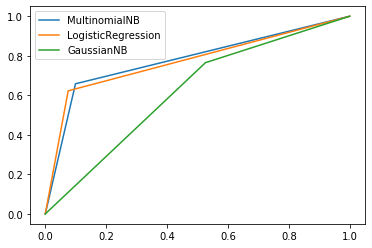

In [41]:
for roc in rocDet:
    print(roc[0])
    fpr = roc[1]
    tpr = roc[2]
    plt.plot(fpr,tpr,label=roc[0])
    plt.legend()

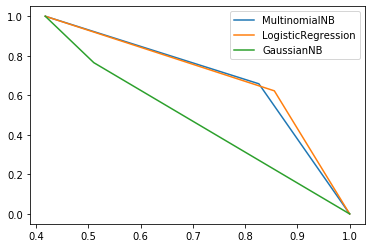

In [42]:
for prc in prcList:
    precision = prc[1]
    recall = prc[2]
    plt.plot(precision,recall,label=prc[0])
    plt.legend()

# Finalising algorithms and saving models

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
import pickle
pkl_Filename = "regModel"

with open(pkl_Filename, 'wb') as file:
    pickle.dump(logreg,file)

In [ ]:

from IPython.display import FileLink
FileLink('regModel.pkl')

In [ ]:
#cheking if model saved works
with open(pkl_Filename, 'rb') as file: 
    print(file)
    Pickled_LR_Model = pickle.load(file)

In [ ]:
ty = x_train[2]

In [ ]:
y_pred = Pickled_LR_Model.predict(np.reshape(ty,(1,ty.shape[0])))
y_pred

In [ ]:
y_train[:3]

## Function to preprocess test data

In [ ]:
dataTrial = pd.DataFrame(['several casualties as death result in millions'],columns = ['text'])
dataTrial = cleanData(dataTrial)

In [ ]:
dataTrial['text'] = dataTrial['text'].apply(lambda x:[lem.lemmatize(w) for w in x])
dataTrial['text'] = dataTrial['text'].apply(lambda x:' '.join(x))

In [ ]:
Xtest = dataTrial['text']
Xtest = tfidf.transform(Xtest)

In [ ]:
Xtest = Xtest.toarray()

In [ ]:
Xtest.shape

In [ ]:
y_pred = Pickled_LR_Model.predict(Xtest)
y_pred

In [ ]:
ty.shape[0]

In [ ]:
ty = np.reshape(ty,(1,ty.shape[0]))

In [ ]:
ty.shape